# SBC_TFP_china data preprocessing

This notebook has been generated on 2019-11-21 07:59 

The objective of this notebook is to YYY

## Global steps 

The global steps to construct the dataset are the following:

- Lorem ipsum dolor sit amet
- Lorem ipsum dolor sit amet
- Lorem ipsum dolor sit amet

## Data source 

The data source to construct the dataset are the following:


 ### Big Query Dataset 
 
 - asif_firm_china9807 
 - TFP_asif_china 
 ### Google Cloud Storage Dataset 
 
 ### Google Spreadsheet Dataset 
 
 - [TCZ_list_china](https://docs.google.com/spreadsheets/d/15bMeS2cMfGfYJkjuY6wOMzcAUWZNRGpO03hZ8rpgv0Q) 
 - [cityname_and_code](https://docs.google.com/spreadsheets/d/1fIziz-Xt99-Rj6NLm52-i6jScOLXgAY20KJi8k3DruA) 
 - [provinces_location](https://docs.google.com/spreadsheets/d/1pNMYAannF0g47Vrecu9tzrQ83XaaYmnXJeSuIFwr26g)

## Destination

The new dataset is available from XXX

- GS: None
- GCS: SBC_TFP_china.gz
- BG: SBC_TFP_china

# Load Dataset


In [1]:
from Fast_connectCloud import connector
from GoogleDrivePy.google_drive import connect_drive
from GoogleDrivePy.google_platform import connect_cloud_platform
import pandas as pd 
import numpy as np
import pandas_profiling

In [3]:
gs = connector.open_connection(online_connection = False, 
	path_credential = '/Users/thomas/Google Drive/Projects/Client_Oauth/Google_auth/')

service_gd = gs.connect_remote(engine = 'GS')
service_gcp = gs.connect_remote(engine = 'GCP')

gdr = connect_drive.connect_drive(service_gd['GoogleDrive'])

project = 'valid-pagoda-132423'
gcp = connect_cloud_platform.connect_console(project = project,
											 service_account = service_gcp['GoogleCloudP'])

Service Google Drive and Docs, Sheet are now connected. 
Service Google Drive is stored as <googleapiclient.discovery.Resource object at 0x1a1e7134d0> and accessible with "drive" 
Service Google Doc is stored as <googleapiclient.discovery.Resource object at 0x1a1e78c710> and accessible with "doc" 
Service Google Sheet is stored as <googleapiclient.discovery.Resource object at 0x1a1e81c7d0>and accessible with "sheet"
Service account storage and Bigquery are now connected. 
Service account storage is stored as <google.cloud.storage.client.Client object at 0x1a1e650d10> and accessible with "Storage_account" 
Service account Bigquery is stored as <google.cloud.bigquery.client.Client object at 0x1a1e824310> and accessible with "bigquery_account"



## Load asif_firm_china9807 from Google Big Query

Feel free to add description about the dataset or any usefull information.



In [4]:
query = (
          """
SELECT id, year, bdat, geocode4_corr, cityen_correct, Province_en, Lower_location,  
           Larger_location, Coastal, SOE, cic, indu_2, Industry_Name, Short, output, fa_net,  
           employment, input, ownership 
           FROM China.asif_firm_china9807Clean 
           WHERE year >= 2002 AND year <= 2007
          
          """

        )

df_asif_firm_china9807 = gcp.upload_data_from_bigquery(query = query, location = 'US')
df_asif_firm_china9807.head()
    

,id,year,bdat,geocode4_corr,cityen_correct,Province_en,Lower_location,Larger_location,Coastal,SOE,cic,indu_2,Industry_Name,Short,output,fa_net,employment,input,ownership
0,729806463,2003,1987,5120,Ziyang,Sichuan,Southwest,Western,False,PRIVATE,1620,16,Tobacco,Tobacco,14346,6339,164,10177.0,Collective
1,729806463,2005,1987,5120,Ziyang,Sichuan,Southwest,Western,False,PRIVATE,1620,16,Tobacco,Tobacco,36196,4783,188,33288.0,Collective
2,729806463,2004,1987,5120,Ziyang,Sichuan,Southwest,Western,False,PRIVATE,1620,16,Tobacco,Tobacco,24087,5782,198,14636.0,Collective
3,206800679,2006,1987,5120,Ziyang,Sichuan,Southwest,Western,False,PRIVATE,1620,16,Tobacco,Tobacco,20976,4803,177,16361.0,Collective
4,206800679,2000,1987,5120,Ziyang,Sichuan,Southwest,Western,False,PRIVATE,1620,16,Tobacco,Tobacco,17199,7209,211,10499.0,Collective


In [8]:
df_asif_firm_china9807 = df_asif_firm_china9807.loc[
    lambda x: x['year'].isin(['2002', '2003',
                              '2004', '2005',
                              '2006', '2007'])]

In [9]:
df_asif_firm_china9807.shape

(1132196, 19)

In [10]:
df_asif_firm_china9807['ownership'].unique()

array(['Collective', 'SOE', 'Private', 'Foreign', 'HTM'], dtype=object)

In [11]:
(df_asif_firm_china9807
 #.loc[lambda x: x['output'] > 0]
 .groupby(['year', 'SOE'])['output']
 .describe()
 .style
 .format('{0:,.0f}')
)

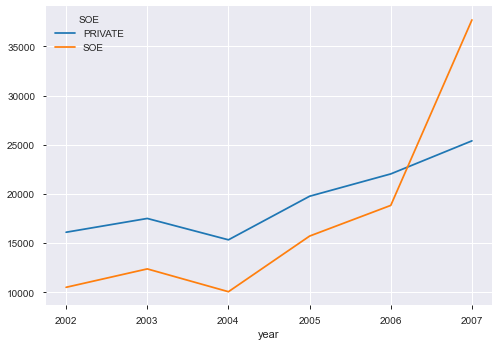

In [12]:
(df_asif_firm_china9807
 # .loc[lambda x: x['output'] > 1000]
 .groupby(['year', 'SOE'])['output']
 .median()
 .unstack(-1)
 .plot()
 )

In [13]:
(df_asif_firm_china9807.groupby(['year', 'SOE'])['output']
     .nunique()
     .unstack(-1)
     #.plot()
    )

SOE,PRIVATE,SOE
year,,
2002,44082,13016
2003,51473,11220
2004,62106,10102
2005,70127,8308
2006,80836,7321
2007,94038,5859



## Load TFP_asif_china from Google Big Query

Feel free to add description about the dataset or any usefull information.



In [14]:
query = (
          """SELECT id, year, cic, tfp, tfp_def
            FROM China.TFP_asif_china 
            WHERE year >= 2002 AND year <= 2007
            """

        )

df_TFP_asif_china = gcp.upload_data_from_bigquery(query = query, location = 'US')
df_TFP_asif_china.head()
    

,id,year,cic,tfp,tfp_def
0,170197977,2002,1620,4.357380,4.650860
1,124881014,2002,1620,5.579128,5.794009
2,143048247,2002,1620,7.788592,7.973028
3,130382625,2002,1620,5.028827,5.248624
4,194724620,2002,1690,4.473667,4.610231


In [15]:
df_TFP_asif_china.groupby(['year'])['tfp'].mean().pct_change() * 100

year
2002         NaN
2003    2.604031
2004   -0.958761
2005    3.992409
2006    1.932197
2007    2.717964
Name: tfp, dtype: float64

In [16]:
df_TFP_asif_china.groupby(['year'])['tfp'].mean()#.pct_change() * 100

year
2002    4.060387
2003    4.166121
2004    4.126178
2005    4.290912
2006    4.373821
2007    4.492700
Name: tfp, dtype: float64

In [17]:
test = df_TFP_asif_china.merge(df_asif_firm_china9807)

In [18]:
test.shape

(1000472, 21)

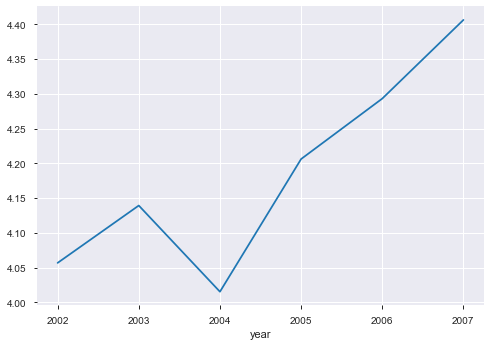

In [19]:
test.groupby(['year'])['tfp'].median().plot()

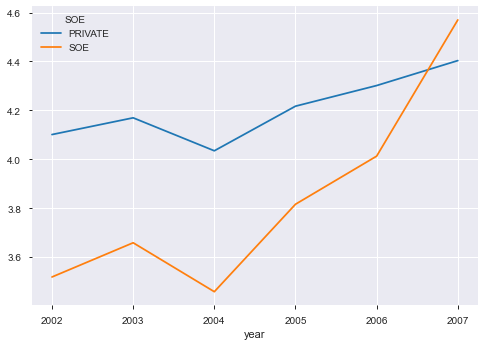

In [20]:
test.groupby(['year', 'SOE'])['tfp'].median().unstack(-1).plot()

In [21]:
test.columns

Index(['id', 'year', 'cic', 'tfp', 'tfp_def', 'bdat', 'geocode4_corr',
       'cityen_correct', 'Province_en', 'Lower_location', 'Larger_location',
       'Coastal', 'SOE', 'indu_2', 'Industry_Name', 'Short', 'output',
       'fa_net', 'employment', 'input', 'ownership'],
      dtype='object')

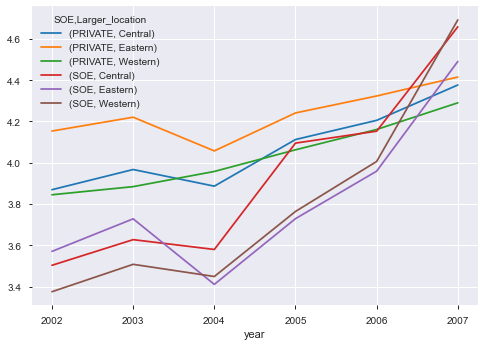

In [27]:
test.groupby(['year', 'SOE', 'Larger_location'])['tfp'].median().unstack([1, 2]).plot()


## Load TCZ_list_china from Google Spreadsheet

Feel free to add description about the dataset or any usefull information.

Profiling will be available soon for this dataset



In [28]:

### Please go here https://docs.google.com/spreadsheets/d/15bMeS2cMfGfYJkjuY6wOMzcAUWZNRGpO03hZ8rpgv0Q
### To change the range

sheetid = '15bMeS2cMfGfYJkjuY6wOMzcAUWZNRGpO03hZ8rpgv0Q'
sheetname = 'TCZ'

df_TCZ_list_china = gdr.upload_data_from_spreadsheet(sheetID = sheetid,
sheetName = sheetname,
	 to_dataframe = True)
df_TCZ_list_china.head()


,Province,City,geocode4_corr,TCZ
1,Beijing,Beijing,1101,1
2,Tianjin,Tianjin,1201,1
3,Hebei,Shijiazhuang,1301,1
4,Hebei,Tangshan,1302,1
5,Hebei,Qinhuangdao,1303,0


## Load CIC_4_digit_average_SO2 from Google Spreadsheet

Feel free to add description about the dataset or any usefull information.

Profiling will be available soon for this dataset

In [29]:
### Please go here https://docs.google.com/spreadsheets/d/1MdHt1EKUexT9J1ISyo8TJXbq0BRhIxyML6t9dZItFuw
### To change the range

sheetid = '1MdHt1EKUexT9J1ISyo8TJXbq0BRhIxyML6t9dZItFuw'
sheetname = 'cic_avg_so2'

df_CIC_4_digit_average_SO2 = gdr.upload_data_from_spreadsheet(sheetID = sheetid,
sheetName = sheetname,
	 to_dataframe = True)
df_CIC_4_digit_average_SO2.head()

,cic,tso2_i,polluted_di,polluted_mi,polluted_thre
1,3821,18146000,Above,Above,Above
2,3314,15324829.29,Above,Above,Above
3,3351,10926060,Above,Above,Above
4,3311,7474953.73,Above,Above,Above
5,2824,5277988.667,Above,Above,Above


## Load China_cities_target_so2 from Google Spreadsheet

Feel free to add description about the dataset or any usefull information.

Profiling will be available soon for this dataset

In [30]:
### Please go here https://docs.google.com/spreadsheets/d/1z3A_I8_StdyNL5O38s2l9hx6W3VR49CGVmaosypjFMA
### To change the range

sheetid = '1z3A_I8_StdyNL5O38s2l9hx6W3VR49CGVmaosypjFMA'
sheetname = 'China_cities_target_so2'

df_China_cities_target_so2 = gdr.upload_data_from_spreadsheet(sheetID = sheetid,
sheetName = sheetname,
	 to_dataframe = True)
df_China_cities_target_so2.head()

,citycn,cityen,prov2013,SO2_05_city_reconstructed,SO2_obj_2010,tso2_mandate_c,SO2_perc_reduction_c,ttoutput
1,上海,Shanghai,上海市,5.121931736,3.794023508,1.327908228,25.89%,230979744.8
2,昆明,Kunming,云南省,2.237456274,2.147443665,0.09001260872,1.72%,6370188.23
3,曲靖,Qujing,云南省,1.223687618,1.174458806,0.04922881224,0.94%,1871252.789
4,玉溪,Yuxi,云南省,0.7709518273,0.7399365239,0.0310153034,0.59%,2821705.393
5,思茅,Simao,云南省,0.2493996689,0.2393663489,0.01003332001,0.19%,240283.799


# Workflow

In this section, we will construct the dataset, and document each step of the workflow.

Please use the following format for the documentation:

- `##` Step 1: XXX
- `###` (optional) Underlying process description
- `##` Step 2: YYY
- `###` (optional) Underlying process description

Note: **You need to rename the last dataframe `df_final`**

In [31]:
 query = (
          "SELECT * "
            "FROM China.SBC_pollution_China "

        )

df_temp = gcp.upload_data_from_bigquery(query = query, location = 'US')
df_temp.head()

,year,Period,Province_en,Lower_location,Larger_location,Coastal,cityen,geocode4_corr,TCZ_c,target_c,...,tso2_cit,tso2_i,tCOD_cit,twaste_water_cit,polluted_di,polluted_mi,polluted_thre,FE_c_i,FE_t_i,FE_t_c
0,2002,Before,Shanxi,Central,Central,False,Yuncheng,1408,TCZ,0.485030,...,24500,168934.454545,0.0,500,Above,Below,Above,11104,1573,889
1,2006,After,Hunan,Central,Central,False,Xiangtan,4303,TCZ,0.092754,...,2304,168934.454545,0.0,300,Above,Below,Above,11105,1574,420
2,2007,After,Hunan,Central,Central,False,Xiangtan,4303,TCZ,0.092754,...,2304,168934.454545,0.0,240,Above,Below,Above,11105,1572,421
3,2007,After,Liaoning,Northeast,Eastern,True,Jinzhou,2107,TCZ,0.080512,...,3200,168934.454545,0.0,0,Above,Below,Above,11103,1572,287
4,2002,Before,Liaoning,Northeast,Eastern,True,Shenyang,2101,TCZ,0.230076,...,3840,168934.454545,0.0,3500,Above,Below,Above,11106,1573,432


In [47]:
df_temp.columns

Index(['year', 'Period', 'Province_en', 'Lower_location', 'Larger_location',
       'Coastal', 'cityen', 'geocode4_corr', 'TCZ_c', 'target_c', 'effort_c',
       'industry', 'ind2', 'Short', 'output_fcit', 'capital_fcit',
       'labour_fcit', 'out_share_SOE', 'cap_share_SOE', 'lab_share_SOE',
       'tso2_cit', 'tso2_i', 'tCOD_cit', 'twaste_water_cit', 'polluted_di',
       'polluted_mi', 'polluted_thre', 'FE_c_i', 'FE_t_i', 'FE_t_c'],
      dtype='object')

In [91]:
df_final_tfp = (test[['id', 'year','geocode4_corr', 'cic', 'SOE','tfp',
                      'tfp_def']]
 .rename(columns= {'cic': 'industry'})
 .merge(df_temp.drop(columns = 
                     ['FE_c_i', 'FE_t_i', 'FE_t_c']), 
                     on = ['year', 'geocode4_corr', 'industry'])
 .assign(
        year=lambda x: x['year'].astype('str'),
        industry=lambda x: x['industry'].astype('str')
 )
 .groupby(['Period','year','Coastal','TCZ_c',"cityen", 'geocode4_corr',
           'polluted_thre','industry', 'SOE'])[['tfp', 'target_c']]
                .mean()
                .reset_index()
)
df_final_tfp.shape

(36434, 11)

In [92]:
len(df_final_tfp['cityen'].unique())

228

In [88]:
len(df_final_tfp['industry'].unique())

273

In [93]:
df_final_tfp["FE_c_i"] = pd.factorize(df_final_tfp["cityen"] +
                                      df_final_tfp['industry'])[0]

df_final_tfp["FE_t_i"] = pd.factorize(df_final_tfp["year"] +
                                      df_final_tfp['industry'])[0]

df_final_tfp["FE_t_c"] = pd.factorize(df_final_tfp["year"] + 
                                      df_final_tfp["cityen"])[0]

df_final_tfp["FE_c_i_o"] = pd.factorize(df_final_tfp["cityen"] + 
                                        df_final_tfp["industry"] +
                                        df_final_tfp["SOE"])[0]

df_final_tfp["FE_t_o"] = pd.factorize(
        df_final_tfp["year"] + df_final_tfp["SOE"])[0]

In [94]:
df_final_tfp.shape

(36434, 16)

In [95]:
df_final_tfp['SOE'].value_counts()

PRIVATE    27738
SOE         8696
Name: SOE, dtype: int64

In [96]:
(df_final_tfp
 .groupby([ 'year', 'SOE'])['SOE']
 .count()
 .unstack()
 #.plot(kind='bar',stacked=True)
)

SOE,PRIVATE,SOE
year,,
2002,2150,1185
2003,3555,1534
2004,4805,1744
2005,5159,1564
2006,5561,1382
2007,6508,1287


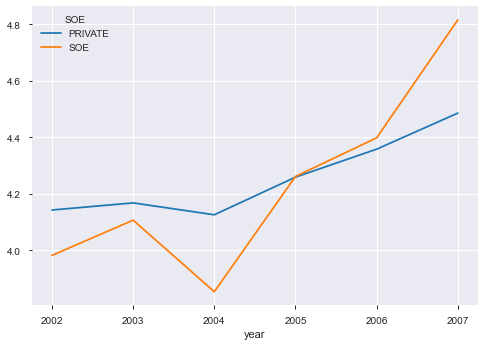

In [97]:
df_final_tfp.groupby(['year', 'SOE'])['tfp'].median().unstack(-1).plot()

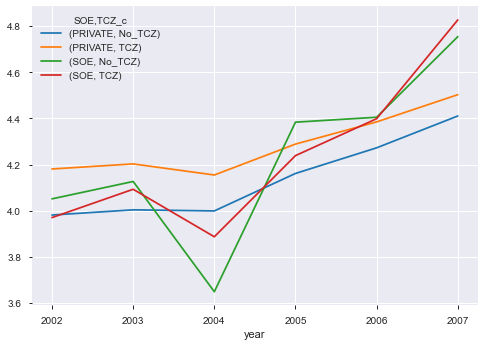

In [98]:
df_final_tfp.groupby(['year', 'SOE', 'TCZ_c'])['tfp'].median().unstack([1, 2]).plot()

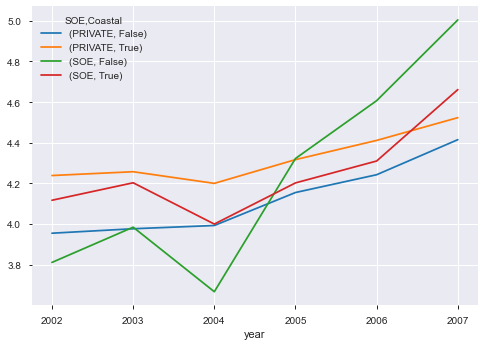

In [100]:
df_final_tfp.groupby(['year', 'SOE', 'Coastal'])['tfp'].median().unstack([1, 2]).plot()

In [101]:
df_final_tfp.to_csv('temp.csv', index = False)

In [103]:
library(tidyverse)
library(lfe)

df_final <-  read.csv("temp.csv") %>% 
    mutate_if(is.character, as.factor) %>%
    mutate_at(vars(starts_with("FE")), as.factor) %>%
    mutate(
         Period = relevel(Period, ref='Before'),
         TCZ_c = relevel(TCZ_c, ref='No_TCZ'),
         #effort_c = relevel(effort_c, ref='Below'),
         #polluted_di = relevel(polluted_di, ref='Below'),
         #polluted_mi = relevel(polluted_mi, ref='Below'),
         polluted_thre = relevel(polluted_thre, ref='Below'),
  )
head(df_final)

,Period,year,Coastal,TCZ_c,cityen,geocode4_corr,polluted_thre,industry,SOE,tfp,target_c,FE_c_i,FE_t_i,FE_t_c,FE_c_i_o,FE_t_o
,<fct>,<int>,<fct>,<fct>,<fct>,<int>,<fct>,<int>,<fct>,<dbl>,<dbl>,<fct>,<fct>,<fct>,<fct>,<fct>
1,After,2006,False,No_TCZ,Baoji,6103,Above,1331,PRIVATE,4.336147,0.1608424,0,0,0,0,0
2,After,2006,False,No_TCZ,Baoji,6103,Above,2221,PRIVATE,4.509104,0.1608424,1,1,0,1,0
3,After,2006,False,No_TCZ,Baoji,6103,Above,2520,PRIVATE,6.411337,0.1608424,2,2,0,2,0
4,After,2006,False,No_TCZ,Baoji,6103,Above,2621,SOE,3.922854,0.1608424,3,3,0,3,1
5,After,2006,False,No_TCZ,Baoji,6103,Above,2720,PRIVATE,4.595932,0.1608424,4,4,0,4,0
6,After,2006,False,No_TCZ,Baoji,6103,Above,2730,PRIVATE,2.150654,0.1608424,5,5,0,5,0


In [104]:
summary(felm(formula= tfp ~ 
          target_c * polluted_thre * Period 
        #+ SPZ  * polluted_thre * Period
        #+ Coastal * polluted_thre* Period 
                  |
             FE_c_i_o +FE_t_o+FE_t_c + FE_t_i + FE_c_i | 0 |
             industry, data= df_final
             ,
             exactDOF=TRUE))

Warning message in chol.default(mat, pivot = TRUE, tol = tol):
“the matrix is either rank-deficient or indefinite”
Warning message in chol.default(mat, pivot = TRUE, tol = tol):
“the matrix is either rank-deficient or indefinite”



Call:
   felm(formula = tfp ~ target_c * polluted_thre * Period | FE_c_i_o +      FE_t_o + FE_t_c + FE_t_i + FE_c_i | 0 | industry, data = df_final,      exactDOF = TRUE) 

Residuals:
    Min      1Q  Median      3Q     Max 
-5.4063 -0.1568  0.0000  0.1682  4.5672 

Coefficients:
                                        Estimate Cluster s.e. t value Pr(>|t|)
target_c                                      NA      0.00000      NA       NA
polluted_threAbove                            NA      0.00000      NA       NA
PeriodAfter                                   NA      0.00000      NA       NA
target_c:polluted_threAbove                   NA      0.00000      NA       NA
target_c:PeriodAfter                          NA      0.00000      NA       NA
polluted_threAbove:PeriodAfter                NA      0.00000      NA       NA
target_c:polluted_threAbove:PeriodAfter -0.02736      0.05230  -0.523    0.601

Residual standard error: 0.5614 on 20282 degrees of freedom
Multiple R-squared(full m

In [107]:
summary(felm(formula= tfp ~ 
          target_c * polluted_thre * Period 
        #+ SPZ  * polluted_thre * Period
        #+ Coastal * polluted_thre* Period 
                  |
             FE_t_c + FE_t_i + FE_c_i | 0 |
             industry, data= df_final %>% filter(TCZ_c =='TCZ')
             ,
             exactDOF=TRUE))

Warning message in chol.default(mat, pivot = TRUE, tol = tol):
“the matrix is either rank-deficient or indefinite”
Warning message in chol.default(mat, pivot = TRUE, tol = tol):
“the matrix is either rank-deficient or indefinite”



Call:
   felm(formula = tfp ~ target_c * polluted_thre * Period | FE_t_c +      FE_t_i + FE_c_i | 0 | industry, data = df_final %>% filter(TCZ_c ==      "TCZ"), exactDOF = TRUE) 

Residuals:
    Min      1Q  Median      3Q     Max 
-7.0916 -0.2619  0.0000  0.2918  5.5435 

Coefficients:
                                        Estimate Cluster s.e. t value Pr(>|t|)
target_c                                      NA      0.00000      NA       NA
polluted_threAbove                            NA      0.00000      NA       NA
PeriodAfter                                   NA      0.00000      NA       NA
target_c:polluted_threAbove                   NA      0.00000      NA       NA
target_c:PeriodAfter                          NA      0.00000      NA       NA
polluted_threAbove:PeriodAfter                NA      0.00000      NA       NA
target_c:polluted_threAbove:PeriodAfter -0.02375      0.05779  -0.411    0.681

Residual standard error: 0.8347 on 18454 degrees of freedom
Multiple R-squared

In [ ]:
%load_ext autoreload
%autoreload 2

In [ ]:
import python_programs.Pollution.SBC_pollution as tfp

In [ ]:
df_final = tfp.metafunctionTFP(df_original=df_asif_firm_china9807,
                               SBC_pollution_China= df_temp,
                               df_TCZ_list_china=df_TCZ_list_china,
                               df_TFP_asif_china='',
                               df_China_cities_target_so2=df_China_cities_target_so2,
                               df_CIC_4_digit_average_SO2=df_CIC_4_digit_average_SO2,
                               #order_columns=order_columns,
                               industry_agg='cic',
                               agg_t_c_i_o=False,
                               panel = False,
                               bounce=False)

In [ ]:
df_final.shape

In [ ]:
(df_asif_firm_china9807
 .groupby([ 'year', 'SOE'])['SOE']
 .count()
 .unstack()
 #.plot(kind='bar',stacked=True)
)

pd.concat([
    (df_asif_firm_china9807
 .groupby(['year', 'SOE'])['SOE']
 .count()
 .unstack(-1)
 .rename(columns={'PRIVATE': 'PRIVATE_Raw',
                     'SOE': "SOE_Raw"})
 ),
(df_final
 .assign(year = lambda x:x['year'].astype('int'))
 .groupby(['year', 'SOE'])['SOE']
 .count()
 .unstack(-1))
.rename(columns={'PRIVATE': 'PRIVATE_New',
                     'SOE': "SOE_New"})], axis= 1
 ).dropna().reindex(columns = ['SOE_Raw', 
                     'SOE_New',
                     'PRIVATE_Raw',
                     'PRIVATE_New']).plot(title = 'median')

In [ ]:
pd.concat([
    (df_asif_firm_china9807
 .groupby(['year', 'SOE'])['output']
 .median()
 .unstack(-1)
 .rename(columns={'PRIVATE': 'PRIVATE_Raw',
                     'SOE': "SOE_Raw"})
 ),
(df_final
 .assign(year = lambda x:x['year'].astype('int'))
 .groupby(['year', 'SOE'])['output_fcit']
 .median()
 .unstack(-1))
.rename(columns={'PRIVATE': 'PRIVATE_New',
                     'SOE': "SOE_New"})], axis= 1
 ).dropna().reindex(columns = ['SOE_Raw', 
                     'SOE_New',
                     'PRIVATE_Raw',
                     'PRIVATE_New']).plot(title = 'median')

### Test 

In [ ]:
output_ = df_final['output_fcit'].quantile([.05, .98])
input_ = df_final['input'].quantile([.05, .98])
#va_ = df_final['va'].quantile([.05, .98])
fa_net_ = df_final['capital_fcit'].quantile([.05, .98])
employment_ = df_final['labour_fcit'].quantile([.05, .98])

### Bottom
outliers = False
if outliers:
    for n in [output_, input_, fa_net_, employment_]:
        name  = n.name
        df_final = df_final.loc[ lambda x:
        df_final[name] > n.iloc[0]
                ]
### Top
    for n in [output_, input_, va_, fa_net_
         ]:
        name  = x.name
        df_final = df_final.loc[ lambda x:
        x[name] < n.iloc[1]
                ]

df_final["id_"] = pd.factorize(df_final["id"])[0]

df_final.to_csv(
	'temp.gz',
	sep=',',
	header=True,
	index=False,
	chunksize=100000,
	compression='gzip',
	encoding='utf-8')

df_final.shape

In [ ]:
df_final.describe()

In [ ]:
library(prodest)
df <- read.csv("temp.gz") %>% arrange(id_, year)
head(df)

In [ ]:
dim(df)

In [ ]:
LP.fit <- prodestLP(Y = log(df$output_fcit),
                    fX = log(df$labour_fcit),
                    sX= log(df$capital_fcit),
                    pX = log(df$input),
                    idvar = df$id_,
                    timevar = df$year)
#prodestOP

In [ ]:
OP.fit <- prodestOP(Y = log(df$output_fcit),
                    fX = log(df$labour_fcit),
                    sX= log(df$capital_fcit),
                    pX = log(df$input),
                    idvar = df$id_,
                    timevar = df$year,
                   exit = TRUE)

In [ ]:
summary(LP.fit)

In [ ]:
summary(OP.fit)

In [ ]:
df$tfp_LP <- log(df$output_fcit) - (log(df$labour_fcit) * LP.fit@Estimates$pars[1] +
       log(df$capital_fcit) * LP.fit@Estimates$pars[2])

In [ ]:
df$tfp_OP <- log(df$output_fcit) - (log(df$labour_fcit) * OP.fit@Estimates$pars[1] +
       log(df$capital_fcit) * OP.fit@Estimates$pars[2])

In [ ]:
df %>% group_by(year, SOE) %>% summarize(mean_tfpLP = mean(tfp_LP), 
                                        mean_tfpOP = mean(tfp_OP)
                                        )

In [ ]:
write.csv(df, "TFP_computed_ASIF_china.csv", row.names=FALSE)

### Summary check Python

### Make Panel

First, send the TFP for all observation in GCS

In [ ]:
### First save locally
### Then upload to GCS
bucket_name = 'chinese_data'
destination_blob_name = 'paper_project'
source_file_name = 'TFP_computed_ASIF_china.csv'
gcp.upload_blob(bucket_name, destination_blob_name, source_file_name)

In [ ]:
import pandas as pd
df_ = pd.read_csv("TFP_computed_ASIF_china.csv")
df_final = (df_
                   .groupby(['year', 'cityen', 'industry', 'SOE'])['cityen']
                   .count()
                   .unstack(0)
                   .dropna(axis=0)
                   .reset_index('SOE')
                   .groupby(level=[0, 1])['SOE']
                   .count()
                   .loc[lambda x: x == 2]
                   .reset_index()
                   .rename(columns={'SOE': 'count'})
                   ).merge(df_)
df_final.shape

# Archive

In [ ]:
df_ = pd.read_csv("TFP_computed_ASIF_china.csv")
print(df_.shape)
keep = True
while keep:
    for i in ['FE_c_i', 'FE_t_i', 'FE_t_c']:
        # test
        try:
            test = (df_.groupby([i])[i]
                .count()
                .reset_index(name='count')
                .groupby(['count'])['count']
                .count()
                .loc[1]
                )
            keep = True
        except:
            keep = False
        
        df_ = (df_.groupby([i])[i]
               .count()
               .reset_index(name='count')
               .merge(df_)
               .loc[lambda x: ~x['count'].isin([1])]
               .drop(columns='count')
               )
df_.shape

In [ ]:
for i in ['FE_c_i', 'FE_t_i', 'FE_t_c']:
    test = (df_.groupby([i])[i]
            .count()
            .reset_index(name='count')
            .groupby(['count'])['count']
            .count()
            )
    print(test)

In [ ]:
(df_.groupby(['id'])['id']
 .count()
 .reset_index(name = 'count')
 .groupby('count')['count']
 .count()
)

In [ ]:
(df_.groupby(['id', 'SOE'])['id']
 .count()
 .reset_index(name = 'count')
 .groupby(['SOE','count'])['count']
 .count()
 .unstack(0)
)

In [ ]:
df_["FE_i_tcz"] = (pd.factorize(df_["polluted_thre"] +
                                      df_['TCZ_c'])[0]) +1

(df_.groupby(["FE_i_tcz"])["FE_i_tcz"]
            .count()
            .reset_index(name='count')
            #.groupby(['count'])['count']
            #.count()
            )

In [ ]:
(df_.groupby(["FE_i_tcz", 'cityen'])["FE_i_tcz"]
            .count()
            .reset_index(name='count')
            .sort_values(by = 'count')
            #.groupby(['count'])['count']
            #.count()
            )

In [ ]:
df_.groupby("cityen")['FE_i_tcz'].nunique().loc[lambda x : x == 1]

In [ ]:
df_test = df_.loc[lambda x: ~x['cityen'].isin(['Fangchenggang',
                                     'Liupanshui',
                                     'Tongchuan',
                                     'Yingtan'])]

In [ ]:
df_test.to_csv("test.csv", index = False)

### Temporary test

In [ ]:
### Please go here https://docs.google.com/spreadsheets/d/15bMeS2cMfGfYJkjuY6wOMzcAUWZNRGpO03hZ8rpgv0Q
### To change the range

sheetid = '15bMeS2cMfGfYJkjuY6wOMzcAUWZNRGpO03hZ8rpgv0Q'
sheetname = 'All_cities'

df_TCZ_list_china = gdr.upload_data_from_spreadsheet(sheetID = sheetid,
sheetName = sheetname,
	 to_dataframe = True).to_csv('df_TCZ_list_china.csv', index = False)

In [ ]:
library(tidyverse)
library(lfe)

df_TCZ_list_china = read_csv('df_TCZ_list_china.csv') %>% 
select(-c(TCZ, Province))

df_final <-  read.csv("test.csv") %>% 
    mutate_if(is.character, as.factor) %>%
    mutate_at(vars(starts_with("FE")), as.factor) %>%
    mutate(
         Period = relevel(Period, ref='Before'),
         TCZ_c = relevel(TCZ_c, ref='No_TCZ'),
         effort_c = relevel(effort_c, ref='Below'),
         #polluted_di = relevel(polluted_di, ref='Below'),
         #polluted_mi = relevel(polluted_mi, ref='Below'),
         polluted_thre = relevel(polluted_thre, ref='Below'),
  ) %>% left_join(df_TCZ_list_china)
head(df_final)

In [ ]:
t1 = felm(formula= tfp_OP ~ TCZ_c * polluted_thre * Period
                  |
          FE_c_i + FE_t_i + FE_t_c
          | 0 |
             cityen, data= df_final,
             exactDOF=TRUE)
summary(t1)

In [ ]:
summary(felm(formula= tfp_OP ~ 
          TCZ_c * polluted_thre * Period 
        #+ SPZ  * polluted_thre * Period
        #+ Coastal * polluted_thre* Period 
                  |
             FE_t_c + FE_t_i + FE_c_i | 0 |
             cityen, data= df_final %>% filter(SOE == "SOE")
             ,
             exactDOF=TRUE))

In [ ]:
summary(felm(formula= tfp_OP ~ 
          TCZ_c * polluted_thre * Period 
        #+ SPZ  * polluted_thre * Period
        #+ Coastal * polluted_thre* Period 
                  |
             FE_t_c + FE_t_i + FE_c_i | 0 |
             cityen, data= df_final %>% filter(SOE != "SOE")
             ,
             exactDOF=TRUE))

In [ ]:
summary(felm(formula= tfp_OP ~ 
          #TCZ_c * polluted_thre * Period 
            SPZ  * polluted_thre * Period
        #+ Coastal * polluted_thre* Period 
                  |
             FE_t_c + FE_t_i + FE_c_i | 0 |
             cityen, data= df_final %>% filter(SOE == "SOE")
             ,
             exactDOF=TRUE))

In [ ]:
summary(felm(formula= tfp_OP ~ 
          #TCZ_c * polluted_thre * Period 
            SPZ  * polluted_thre * Period
        #+ Coastal * polluted_thre* Period 
                  |
             FE_t_c + FE_t_i + FE_c_i | 0 |
             cityen, data= df_final %>% filter(SOE != "SOE")
             ,
             exactDOF=TRUE))

In [ ]:
summary(felm(formula= tfp_OP ~ 
          #TCZ_c * polluted_thre * Period 
            #SPZ  * polluted_thre * Period
            Coastal * polluted_thre* Period 
                  |
             FE_t_c + FE_t_i + FE_c_i | 0 |
             cityen, data= df_final %>% filter(SOE == "SOE")
             ,
             exactDOF=TRUE))

In [ ]:
summary(felm(formula= tfp_OP ~ 
          #TCZ_c * polluted_thre * Period 
            #SPZ  * polluted_thre * Period
            Coastal * polluted_thre* Period 
                  |
             FE_t_c + FE_t_i + FE_c_i | 0 |
             cityen, data= df_final %>% filter(SOE != "SOE")
             ,
             exactDOF=TRUE))

In [ ]:
summary(felm(formula= tfp_OP ~ 
            TCZ_c * polluted_thre * Period +
            SPZ  * polluted_thre * Period +
            Coastal * polluted_thre* Period 
                  |
             FE_t_c + FE_t_i + FE_c_i | 0 |
             cityen, data= df_final %>% filter(SOE == "SOE")
             ,
             exactDOF=TRUE))

In [ ]:
summary(felm(formula= tfp_OP ~ 
            TCZ_c * polluted_thre * Period +
            SPZ  * polluted_thre * Period +
            Coastal * polluted_thre* Period 
                  |
             FE_t_c + FE_t_i + FE_c_i | 0 |
             cityen, data= df_final %>% filter(SOE != "SOE")
             ,
             exactDOF=TRUE))

In [ ]:
df_final.describe()

In [ ]:
### First save locally
df_final.to_csv(
	'SBC_TFP_china.gz',
	sep=',',
	header=True,
	index=False,
	chunksize=100000,
	compression='gzip',
	encoding='utf-8')

# Profiling

In order to get a quick summary statistic of the data, we generate an HTML file with the profiling of the dataset we've just created. 

The profiling will be available at this URL after you commit a push to GitHub. 

**You need to rename the final dataframe `df_final` in the previous section to generate the profiling.**

In [ ]:
#### make sure the final dataframe is stored as df_final
### Overide the default value: 
#https://github.com/pandas-profiling/pandas-profiling/blob/master/pandas_profiling/config_default.yaml

profile = pandas_profiling.ProfileReport(df_final,
                                        check_correlation_pearson = False)
name_html = "NAME.html"
profile.to_file(output_file=name_html)

# Upload to cloud

The dataset is ready to be shared with your colleagues. 





### Move to GCS and BigQuery

We move the dataset to the following:

- **bucket**: *NEED TO DEFINE*

- **Destination_blob**: *XXXXX/Processed_*
- **name**:  *SBC_TFP_china.gz*
- **Dataset**: *China*

- **table**: *SBC_TFP_china*

### GCS

We first need to save *SBC_TFP_china* with `.gz` extension locally then we can move it
to GCS


### Delete previous dataset

In [ ]:
bucket_name = 'chinese_data'
destination_blob_name = 'paper_project/SBC_TFP_china.gz'

gcp.delete_blob(bucket_name = bucket_name,
                destination_blob_name= destination_blob_name)
gcp.delete_table(dataset_name = 'China', name_table = 'SBC_TFP_china')

In [ ]:

### First save locally
df_final.to_csv(
	'SBC_TFP_china.gz',
	sep=',',
	header=True,
	index=False,
	chunksize=100000,
	compression='gzip',
	encoding='utf-8')

### Then upload to GCS
bucket_name = 'chinese_data'
destination_blob_name = 'paper_project'
source_file_name = 'SBC_TFP_china.gz'
gcp.upload_blob(bucket_name, destination_blob_name, source_file_name)

In [ ]:


### Move to bigquery
bucket_gcs ='chinese_data/paper_project/SBC_TFP_china.gz'
gcp.move_to_bq_autodetect(dataset_name= 'China',
							 name_table= 'SBC_TFP_china',
							 bucket_gcs=bucket_gcs)
